In [1]:
# SETUP ENV
% pip install matplotlib
% pip install opencv-python

UsageError: Line magic function `%` not found.


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

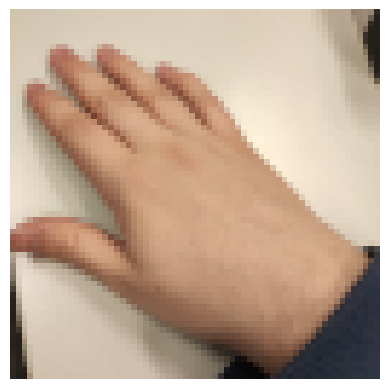

In [2]:
# Load image

img = cv2.cvtColor(cv2.imread("rynca.png"), cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

[207 195 170]
[[113.98948 113.73556 235.27496]]
[208 196 173]
[[115.619744 112.735232 235.645024]]
[208 196 175]
[[116.619744 111.897856 235.4824  ]]
[208 195 176]
[[117.28848  111.810432 234.901088]]
[209 196 177]
[[117.918744 111.64748  235.433776]]
[210 197 179]
[[119.049008 111.06584  235.885152]]
[210 199 181]
[[119.711536 109.565936 236.722528]]
[210 199 180]
[[119.211536 109.984624 236.80384 ]]
[211 200 180]
[[119.3418  110.24036 237.41784]]
[212 201 181]
[[119.972064 110.077408 237.950528]]
[212 201 181]
[[119.972064 110.077408 237.950528]]
[213 202 182]
[[120.602328 109.914456 238.483216]]
[214 201 182]
[[121.070064 110.83272  238.097216]]
[215 202 183]
[[121.700328 110.669768 238.629904]]
[216 203 184]
[[122.330592 110.506816 239.162592]]
[216 203 184]
[[122.330592 110.506816 239.162592]]
[216 203 184]
[[122.330592 110.506816 239.162592]]
[216 203 184]
[[122.330592 110.506816 239.162592]]
[217 204 185]
[[122.960856 110.343864 239.69528 ]]
[216 203 184]
[[122.330592 110.506816

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 35.056672 112.806048 152.13728 ]]
[43 48 60]
[[ 34.757672 112.219048 152.02328 ]]
[42 47 59]
[[ 34.127408 112.382    151.490592]]
[43 49 61]
[[ 35.088936 111.469096 152.441968]]
[49 54 67]
[[ 39.039256 110.822648 155.138096]]
[48 53 66]
[[ 38.408992 110.9856   154.605408]]
[44 38 32]
[[ 22.744032 127.841952 149.414016]]
[34 30 26]
[[ 18.10392  127.134192 144.761888]]
[30 26 23]
[[ 16.082864 127.367312 142.549824]]
[161 144 120]
[[ 83.841016 124.562424 208.59656 ]]
[207 192 173]
[[115.995688 113.473288 233.531024]]
[207 192 173]
[[115.995688 113.473288 233.531024]]
[207 192 173]
[[115.995688 113.473288 233.531024]]
[208 193 174]
[[116.625952 113.310336 234.063712]]
[208 193 174]
[[116.625952 113.310336 234.063712]]
[207 192 172]
[[115.495688 113.891976 233.612336]]
[207 192 173]
[[115.995688 113.473288 233.531024]]
[208 193 174]
[[116.625952 113.310336 234.063712]]
[208 193 174]
[[116.625952 113.310336 234.063712]]
[209 194 175]
[[117.256216 113.147384 234.5964  ]]
[209 194 175]
[[11

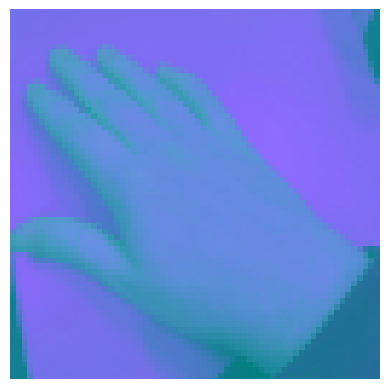

In [3]:
# RGB to YCbCr conversion 

conv_matrix = np.matrix([[0.299, 0.587, 0.114], 
                         [-0.168736, -0.331264, 0.5], 
                         [0.5, -0.418688, -0.081312]])
add_array = [0, 128, 128]

conv_image = np.zeros((img.shape[0], img.shape[1], 3)).astype('int32')

for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        print(img[i,j])
        pixel = (img[i, j] * conv_matrix) + add_array
        print(pixel)
        conv_image[i, j] = (int(pixel[0, 0]), int(pixel[0, 1]), int(pixel[0, 2]))
plt.axis('off')
plt.imshow(conv_image)


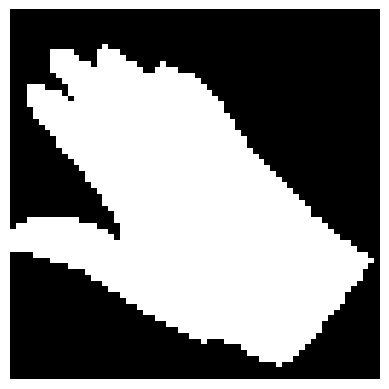

In [9]:
# Thresholding

T_a = 130
T_b = 255
T_c = 160
T_d = 255


bin_img = np.zeros((conv_image.shape[0], conv_image.shape[1]))


for i in range(0, conv_image.shape[0]):
    for j in range(0, conv_image.shape[1]):
        if conv_image[i, j, 1] > T_a and conv_image[i, j, 1] < T_b and conv_image[i, j, 2] > T_c and conv_image[i, j, 2] < T_d:
            bin_img[i, j] = 255
        else:
            bin_img[i, j] = 0

plt.axis('off')
plt.imshow(bin_img, cmap='gray')

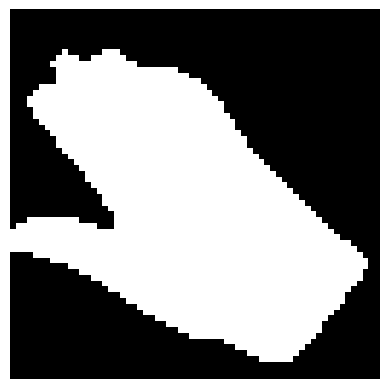

In [17]:
bin_img = bin_img.astype('uint8')
scaled_bin = np.zeros((bin_img.shape[0], bin_img.shape[1], 3)).astype('uint8')


for i in range(bin_img.shape[0]):
    for j in range(bin_img.shape[1]):
        if bin_img[i, j] > 0:
            scaled_bin[i, j] = (255, 255, 255)
        else:
            scaled_bin[i, j] = (0, 0, 0)

blurred = cv2.medianBlur(scaled_bin, 5)




plt.axis('off')
plt.imshow(blurred, cmap='gray')

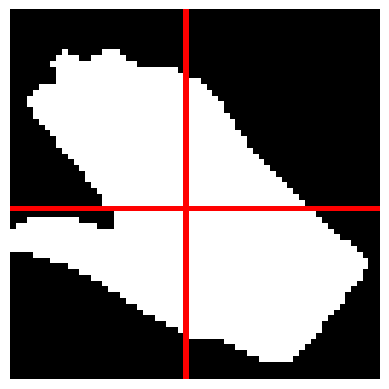

In [20]:
m00 = 0
m01 = 0
m10 = 0

# line_prep = np.zeros((blurred.shape[0], blurred.shape[1], 3)).astype('uint8')

for i in range(blurred.shape[0]):
    for j in range(blurred.shape[1]):
        m00 += blurred[i, j, 0]
        m01 += blurred[i, j, 0] * i
        m10 += blurred[i, j, 0] * j
        # # print(blurred[i, j])
        # if blurred[i, j] == (255, 255, 255):
        #     line_prep[i, j] = (255, 127, 127)
        # else:
        #     line_prep[i, j] = (0, 0, 0)

x_sc = int(m10/m00)
y_sc = int(m01/m00)

# print(x_sc)
# print(y_sc)

start_x = (x_sc, 0)
end_x = (x_sc, 63)

start_y = (0, y_sc)
end_y = (63, y_sc)

color = (255, 0, 0)

thickness = 1

line_img = cv2.line(blurred, start_x, end_x, color, thickness)
line_img = cv2.line(line_img, start_y, end_y, color, thickness)

plt.axis('off')
plt.imshow(line_img)



In [21]:
# Save to file

with open('out.ppm', 'w') as f:
    f.write("P6\n")
    f.write("64 64\n")
    f.write("255\n")
    blurred.tofile(f)

In [ ]:
# 11101111 1011111 1101011
# 3befeb




# OUT: 00010111 11101001 11000101